# 0. Dependências 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Introdução 

# 2. Dados 

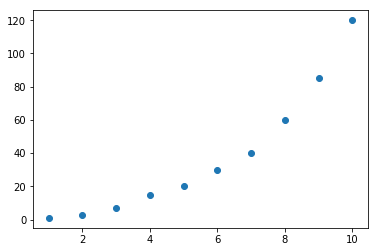

In [2]:
x = np.arange(1, 11).reshape(-1, 1)
y = np.array([1, 3, 7, 15, 20, 30, 40, 60, 85, 120]).reshape(-1, 1)

plt.scatter(x, y)

# 3. Implementação

In [3]:
class PolynomialRegression():
    def __init__(self, degree=2):
        self.degree = degree
        self.b = None
        
    def fit(self, x, y):
        powers = self.__compute_powers(x)
        
        b1 = np.linalg.inv(np.dot(powers.T, powers))
        b2 = np.dot(powers.T, y)
        self.b = np.dot(b1, b2)
    
    def predict(self, x):
        powers = self.__compute_powers(x)
        return np.dot(powers, self.b)
    
    def __compute_powers(self, x):
        x = x.ravel()
        powers = np.empty((x.shape[0], self.degree + 1))
        powers[:, 0] = np.ones(x.shape[0])
        powers[:, 1] = x
        
        for p in range(2, self.degree+1):
            powers[:, p] = x**p
        return powers

# 4. Teste

## Regressão Quadrática

In [4]:
reg = PolynomialRegression()
reg.fit(x, y)

print(reg.b)

[[ 10.76666667]
 [ -7.49242424]
 [  1.78030303]]


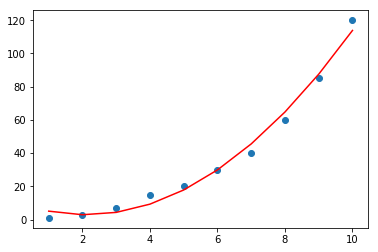

In [5]:
y_pred = reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

### Comparação com o Scikit-Learn

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
poly.fit(x, y)

reg = LinearRegression()
reg.fit(poly.transform(x), y)

print(reg.intercept_, reg.coef_)

[ 10.76666667] [[ 0.         -7.49242424  1.78030303]]


## Regressão Cúbica

In [7]:
def make_cubic(n_samples, x_min, x_max, a=1, b=0, c=0, d=0, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.linspace(x_min, x_max, n_samples)
    y = a*x**3 + b*x**2 + c*x + d + (2*noise*np.random.random(n_samples) - noise)
    return x.reshape(-1,1), y.reshape(-1,1)

(100, 1) (100, 1)


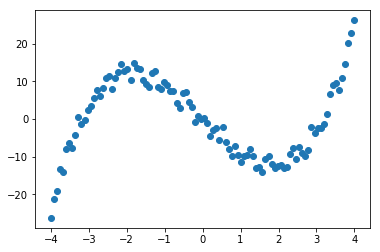

In [8]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)
plt.scatter(x, y)

[[ -0.18147954]
 [-10.22969684]
 [  0.03369393]
 [  1.02064375]]


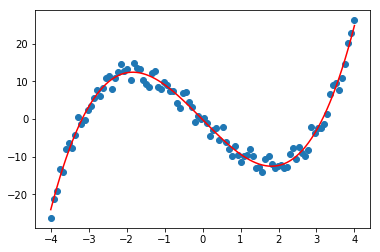

In [9]:
reg = PolynomialRegression(degree=3)
reg.fit(x, y)

print(reg.b)

y_pred = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

### Comparação com o Scikit-Learn

In [10]:
poly = PolynomialFeatures(degree=3)
poly.fit(x, y)

reg = LinearRegression()
reg.fit(poly.transform(x), y)

print(reg.intercept_, reg.coef_)

[-0.18147954] [[  0.         -10.22969684   0.03369393   1.02064375]]
